In [1]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
import sklearn

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df=pd.read_csv("/Users/ebby/Downloads/Rainfall_new.csv - Rainfall_new.csv.csv")

In [4]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan.Feb,Mar.May,Jun.Sep,Oct.Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


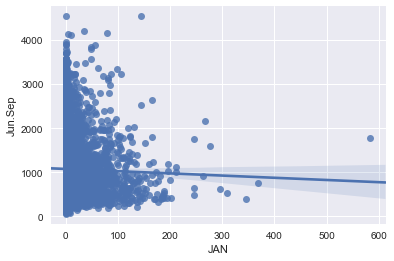

In [15]:
dfx=df[df["SUBDIVISION"]=="ORISSA"]
sns.regplot(x="JAN",y="Jun.Sep",data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113a4fa58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11795d748>]], dtype=object)

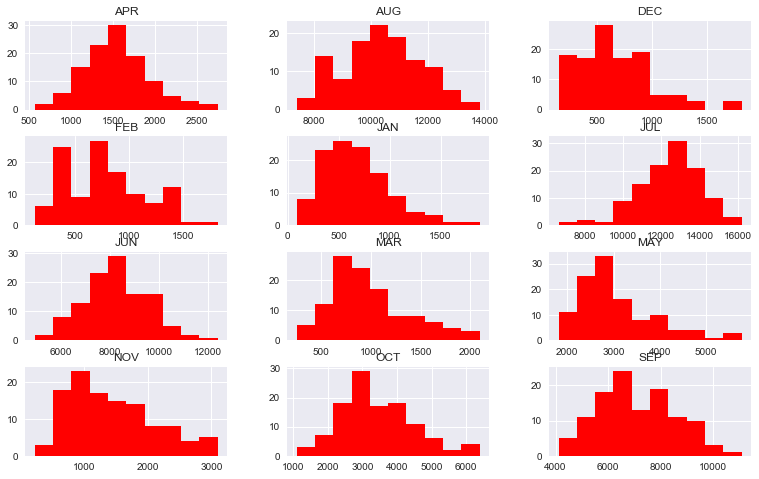

In [5]:
df[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().hist(figsize=(13,8),color="red")

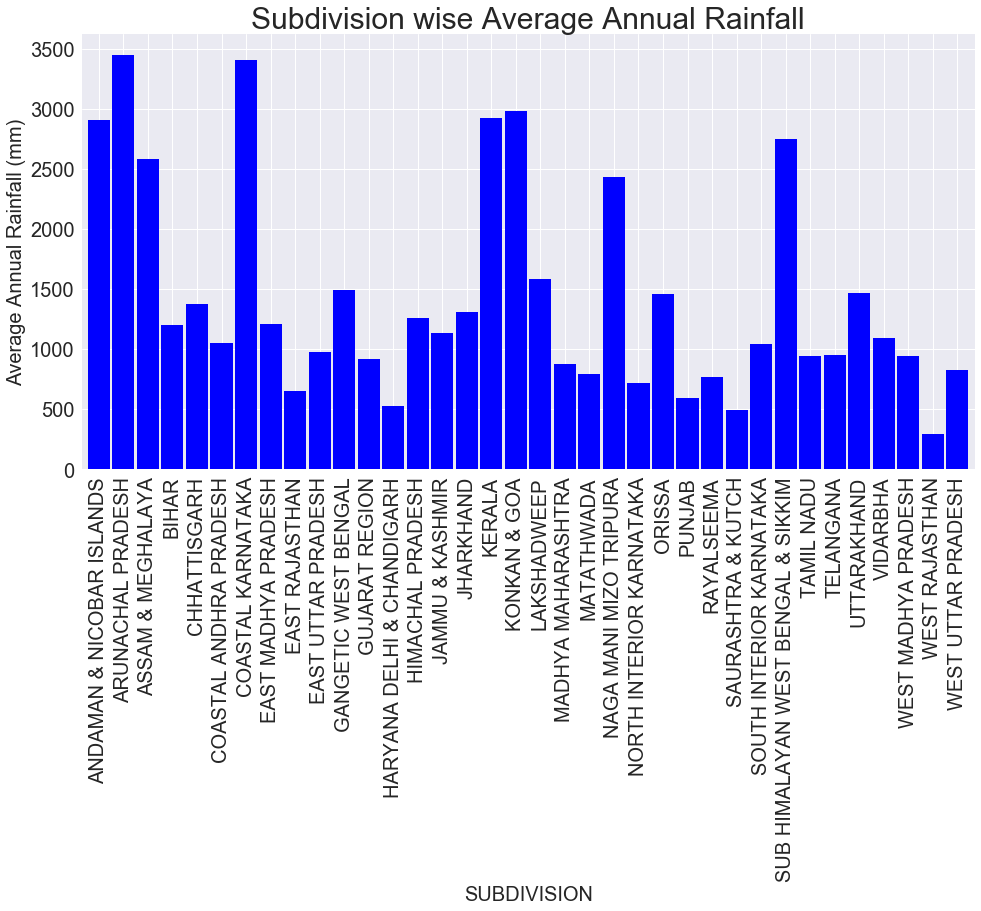

In [6]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('SUBDIVISION').mean()['ANNUAL'].plot('bar', color='b',width=0.9,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

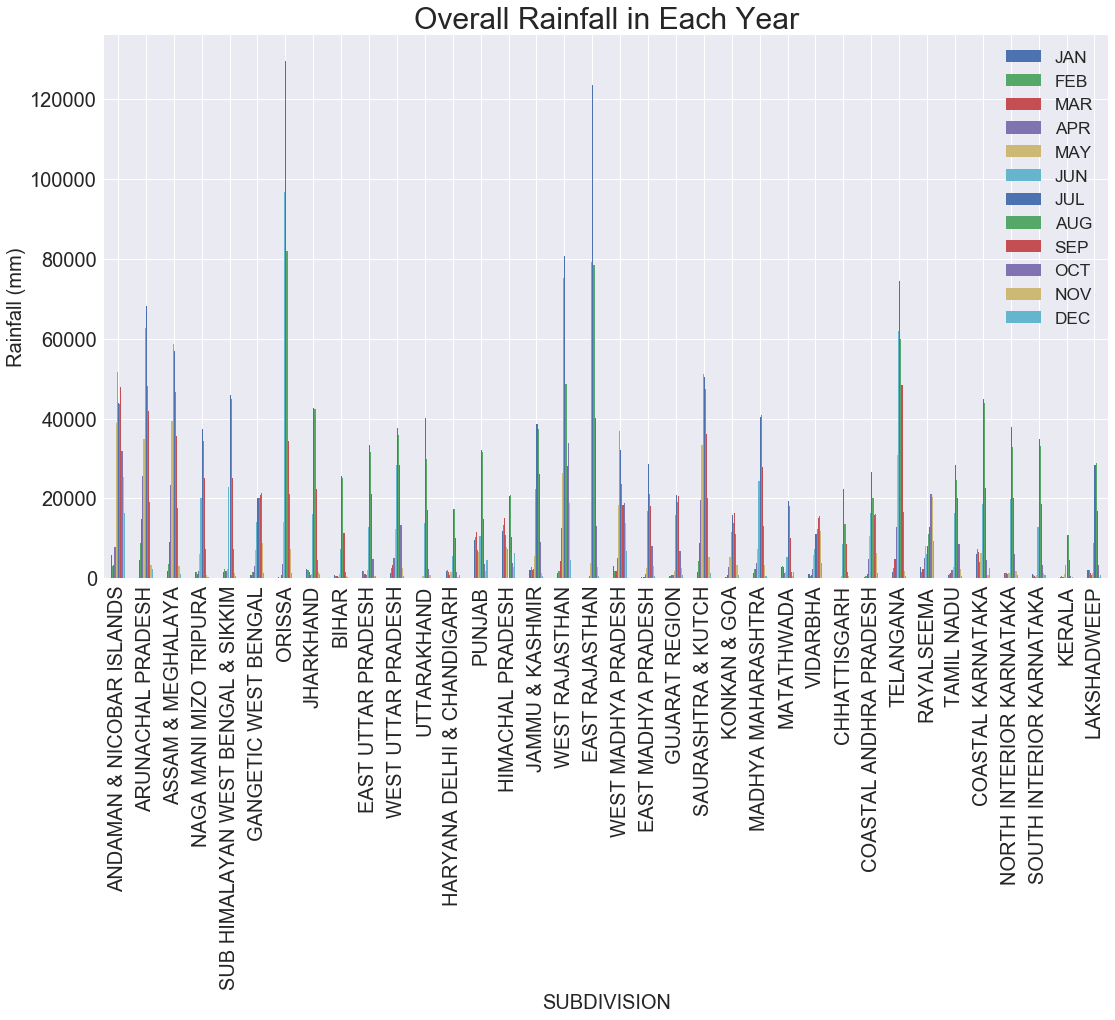

In [8]:
x=df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
dfg = df.groupby('SUBDIVISION').sum()[x]
dfg.plot.bar(title='Overall Rainfall in Each Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

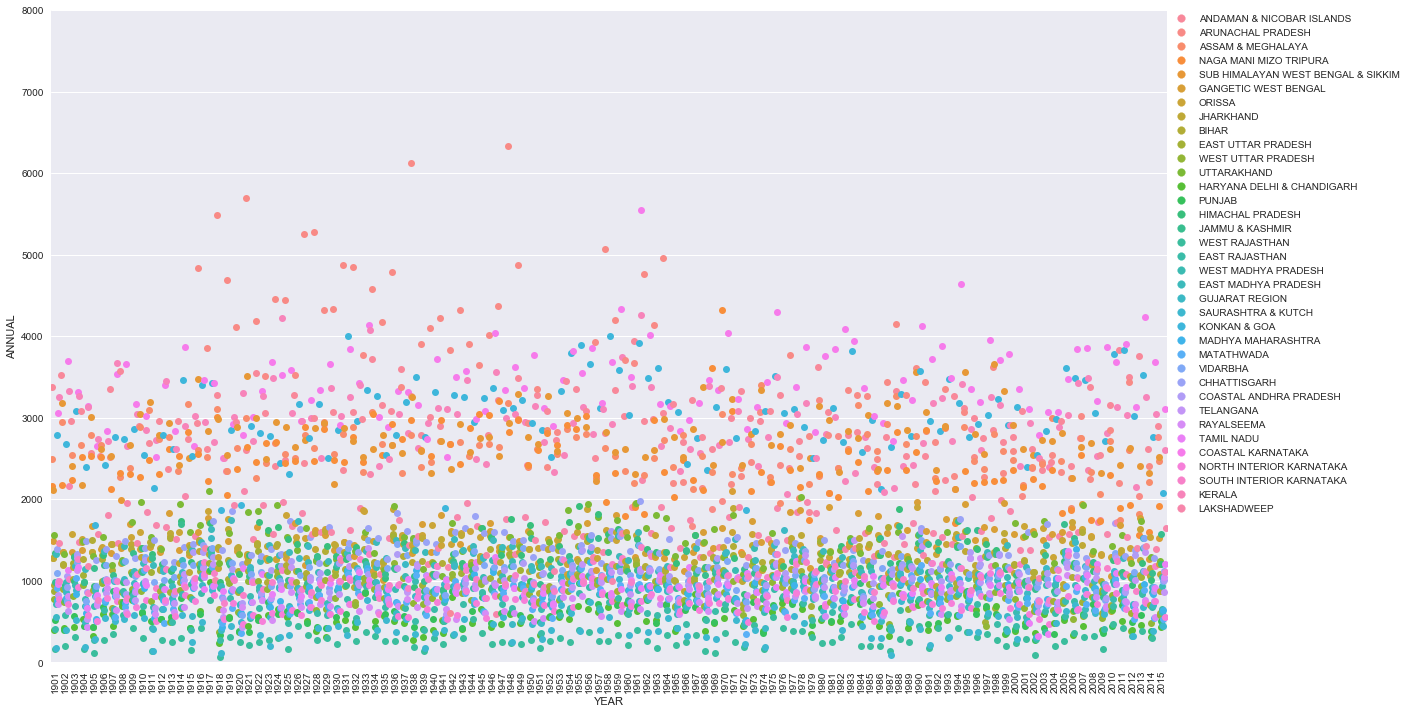

In [25]:
plt.figure(figsize=(20, 12))

# Adjust the y-axis
plt.ylim(0, 8000)
df.groupby("SUBDIVISION")
# Organize by type [split], make points larger [size]
g=sns.swarmplot(
    data=df, x='YEAR', y='ANNUAL', hue='SUBDIVISION', split=True, size=7);
plt.xticks(rotation = 90)
#g.set_xticklabels(labels = df["YEAR"].index.tolist(),rotation=30)
#g.set_xticklabels(rotation=30)
# Move legend out of the way
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.);

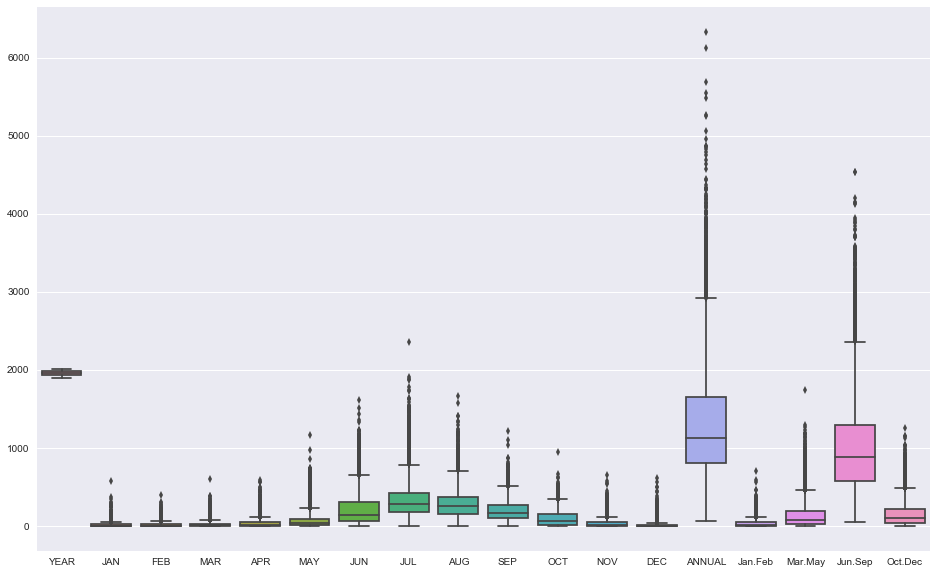

In [5]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=df)

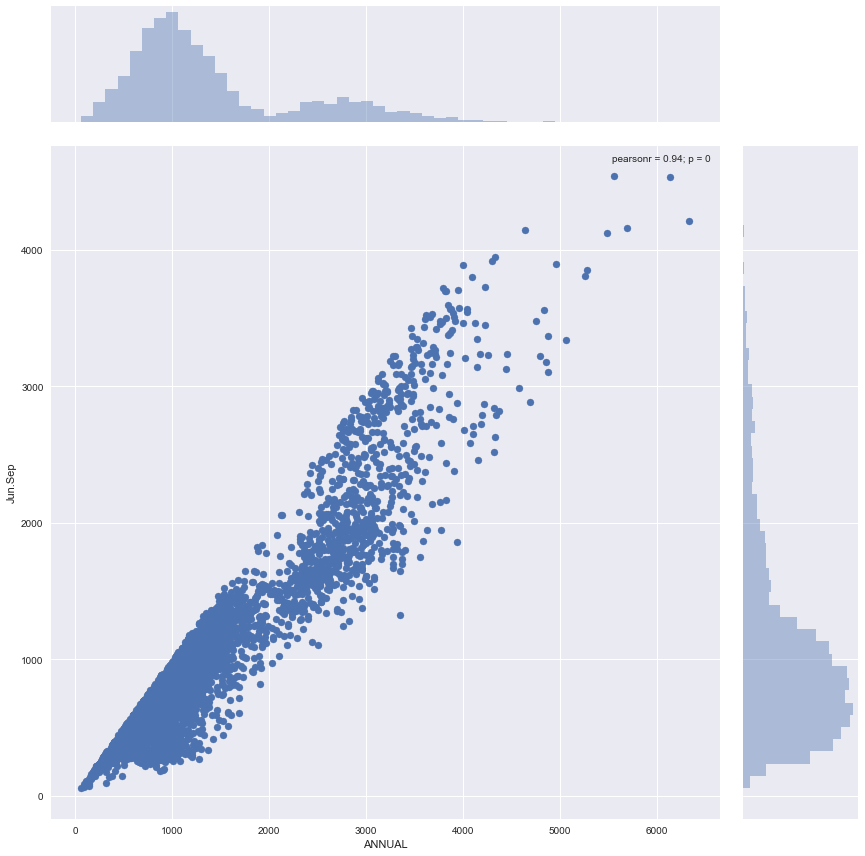

In [24]:
df["YEAR"]=df["YEAR"].astype(int)
df["ANNUAL"]=df["ANNUAL"].astype(int)
plt.figure(figsize=(20,10))
sns.jointplot(x="ANNUAL",y="Jun.Sep",data=df,size=12)

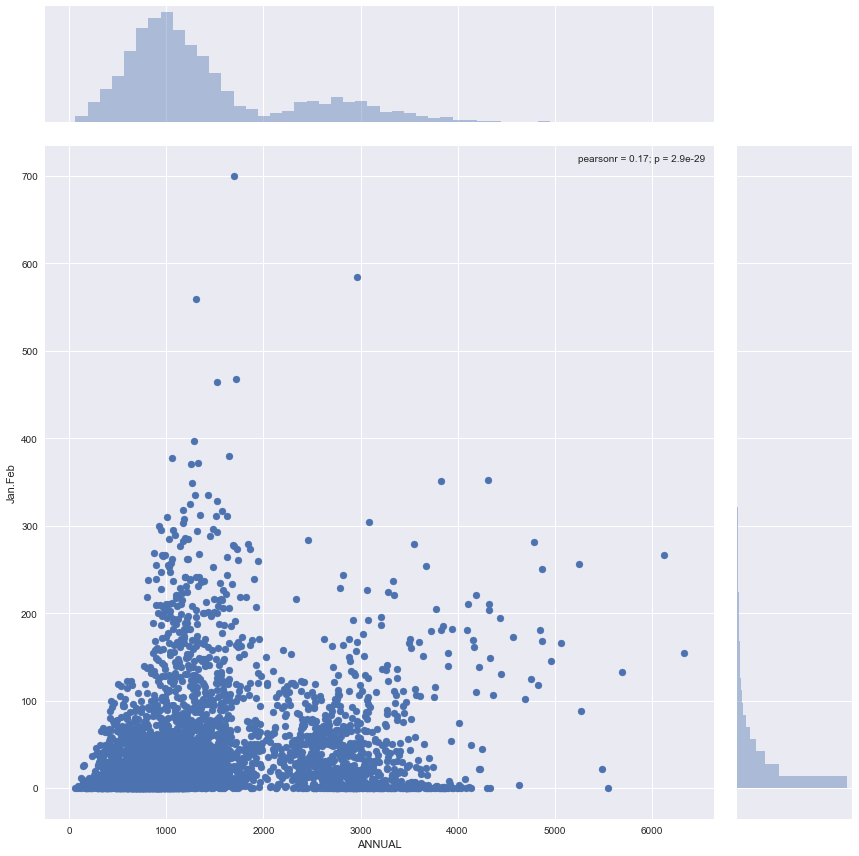

In [13]:
df["YEAR"]=df["YEAR"].astype(int)
df["ANNUAL"]=df["ANNUAL"].astype(int)
plt.figure(figsize=(20,10))
sns.jointplot(x="ANNUAL",y="Jan.Feb",data=df,size=12)

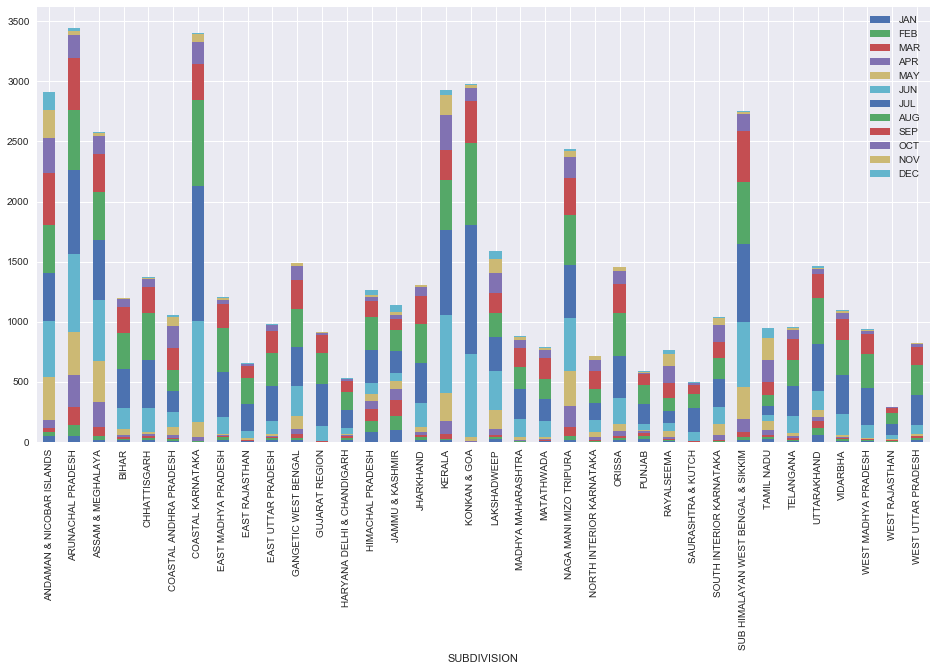

In [21]:
df[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").mean().plot.bar(stacked=True,figsize=(16,8))

In [4]:
months = df.columns[2:14]
print(months)

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')


Mean Absolute Difference in Training set: 75.5054636791
Mean Absolute Difference in Testing set: 76.8001644151


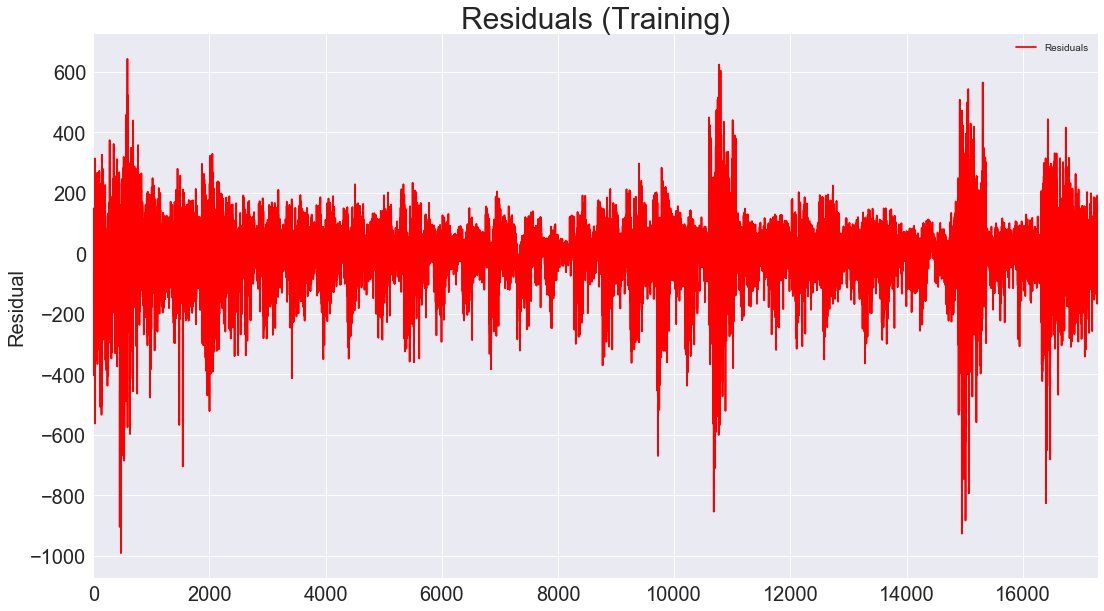

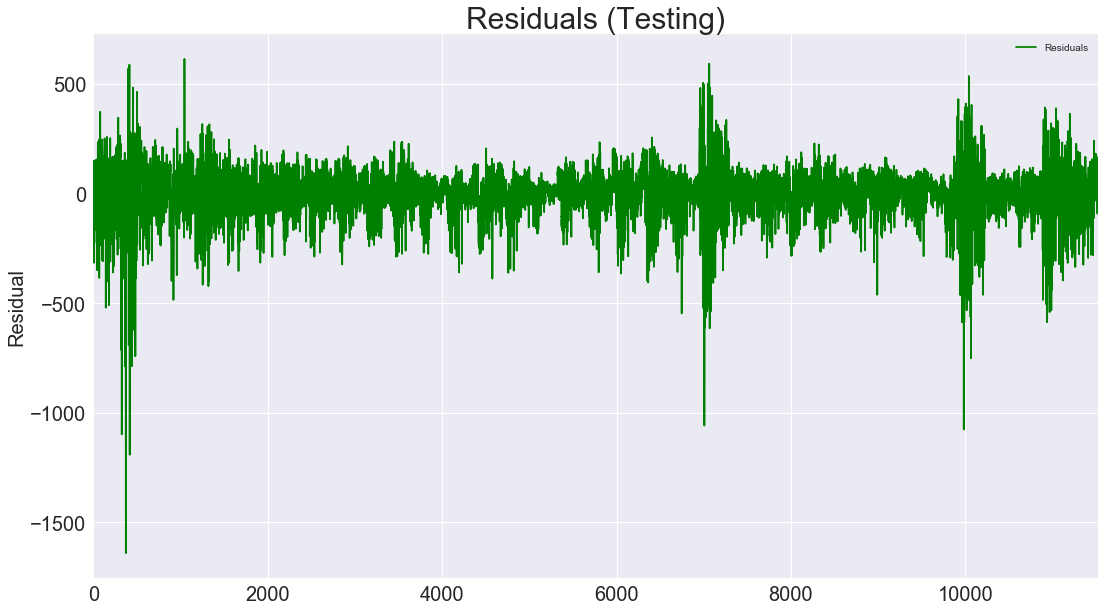

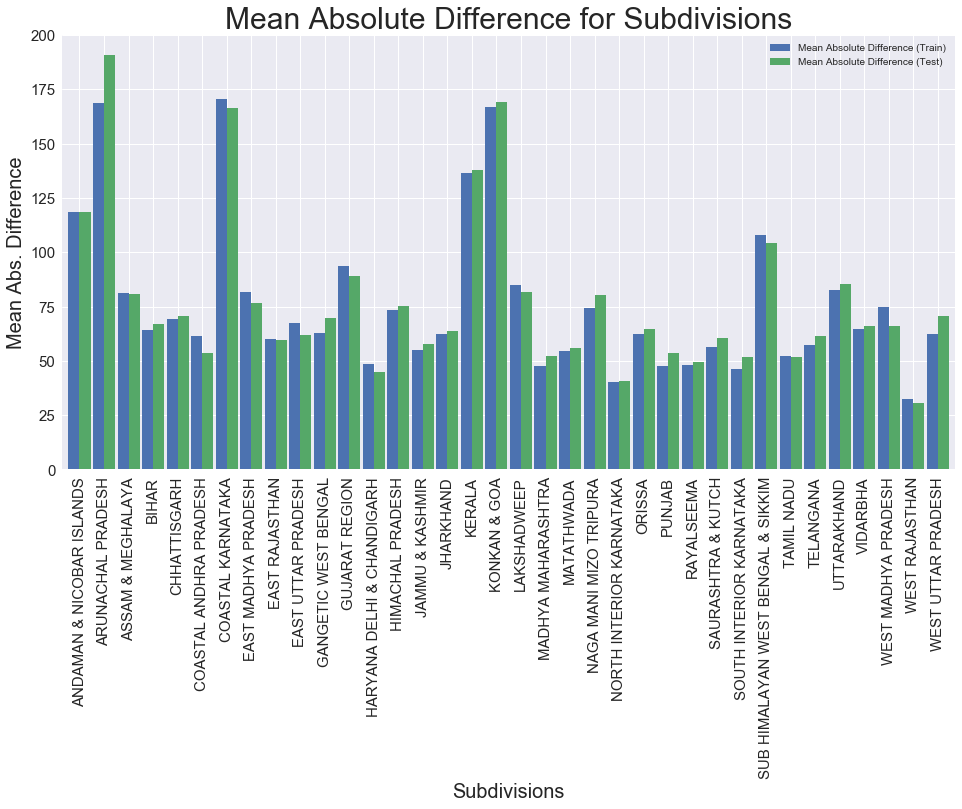

In [8]:
subdivs = df['SUBDIVISION'].unique()
num_of_subdivs = subdivs.size

df_res_training = pd.DataFrame(columns=np.array(['Residuals']))
df_res_testing = pd.DataFrame(columns=np.array(['Residuals']))
list_mad_training = []
mean_abs_diff_training = 0
list_mad_testing = []
mean_abs_diff_testing = 0
for subd in subdivs:
    df1 = df[df['SUBDIVISION']==subd]
    df2 = df1[[months[0],months[1],months[2],months[3],months[4],months[5]]]
    df2.columns = np.array(['x1','x2','x3','x4','x5','x6'])
    for k in range(1,7):
        df3 = df1[[months[k],months[k+1],months[k+2],months[k+3],months[k+4],months[k+5]]]
        df3.columns = np.array(['x1','x2','x3','x4','x5','x6'])
        df2 = df2.append(df3)
    df2.index = range(df2.shape[0])
    msk = np.random.rand(len(df2)) < 0.6
    df_train = df2[msk]
    df_test = df2[~msk]
    df_train.index = range(df_train.shape[0])
    df_test.index = range(df_test.shape[0])
    reg = linear_model.LinearRegression()
    reg.fit(df_train.drop('x6',axis=1),df_train['x6'])
    
    predicted_values = reg.predict(df_train.drop('x6',axis=1))
    residuals = predicted_values-df_train['x6'].values
    df_res_training = df_res_training.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_training = mean_abs_diff_training + np.sum(np.abs(residuals))
    list_mad_training.append(np.mean(np.abs(residuals)))
                                                                                                        
    predicted_values = reg.predict(df_test.drop('x6',axis=1))
    residuals = predicted_values-df_test['x6'].values
    df_res_testing = df_res_testing.append(pd.DataFrame(residuals,columns=np.array(['Residuals'])))
    mean_abs_diff_testing = mean_abs_diff_testing + np.sum(np.abs(residuals))
    list_mad_testing.append(np.mean(np.abs(residuals)))
    
    
df_res_training.index = range(df_res_training.shape[0])
mean_abs_diff_training = mean_abs_diff_training/df_res_training.shape[0]
print('Mean Absolute Difference in Training set: ' + str(mean_abs_diff_training))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_training.plot.line(title='Residuals (Training)', color='r',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

df_res_testing.index = range(df_res_testing.shape[0])
mean_abs_diff_testing = mean_abs_diff_testing/df_res_testing.shape[0]
print('Mean Absolute Difference in Testing set: ' + str(mean_abs_diff_testing))
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
df_res_testing.plot.line(title='Residuals (Testing)', color='g',ax=ax,fontsize=20)
#ax.xaxis.set_ticklabels([])
plt.ylabel('Residual')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)


pd_mad = pd.DataFrame(data=list_mad_training,columns=["Mean Absolute Difference (Train)"])
pd_mad["Mean Absolute Difference (Test)"] = list_mad_testing;
pd_mad['Subdivisions'] = subdivs;
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
#pd_mad.groupby('Subdivisions').mean().plot(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
pd_mad.groupby('Subdivisions').mean().plot.bar( width=0.9,title='Mean Absolute Difference for Subdivisions',ax=ax, fontsize=15)
plt.xticks(rotation = 90)
plt.ylabel('Mean Abs. Difference')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)